In [22]:
!pip install iapws

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Ciclo Rankine Ideal Simple

![](./ciclo-rankine-ideal-simple.png)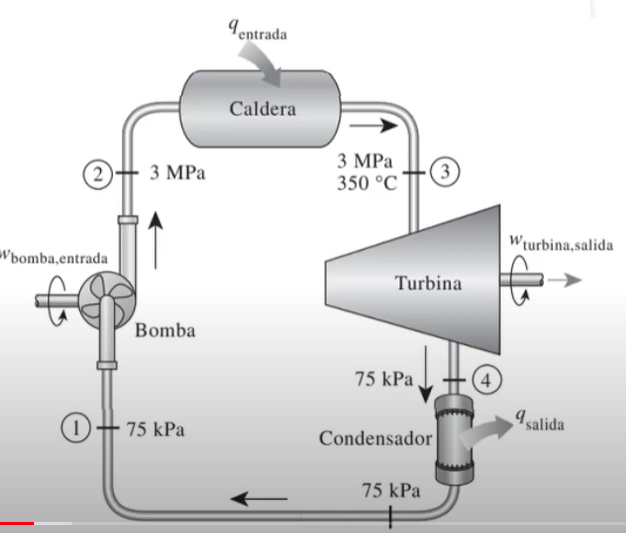


In [23]:
from iapws import IAPWS97

In [24]:
# Estado 1

P1 = 0.075 # MPa
x1 = 0 # fracción molar adimensional
estado1 = IAPWS97(P=P1,x=x1)
v1 = estado1.v   # en m3/kg
h1 = estado1.h   # en kJ/kg
s1 = estado1.s   # en kJ/(kg·K)

In [25]:
# Estado 2

P2 = 3   # MPa
s2 = s1  # isoentrópica

estado2 = IAPWS97(P=P2,s=s2)

h2 = estado2.h

In [26]:
# Estado 3

P3 = P2
T3 = 350.0 + 273.15

estado3 = IAPWS97(P=P3,T=T3)

h3 = estado3.h
s3 = estado3.s

In [27]:
# Estado 4

P4 = P1
s4 = s3

estado4 = IAPWS97(P=P4,s=s4)

h4 = estado4.h

In [45]:
Wbomba             = v1 * ( P2 - P1 ) * 1000 # kJ/kg
Qcaldeiraentrada   = h3 - h2
Qcondensadorsaida  = h1 - h4
Wturbina           = h4 - h3
eficiencia         = abs( Wbomba - Wturbina ) / Qcaldeiraentrada * 100

In [46]:
print('Calor que entra na caldeira  {:.2f} kJ/kg'.format(Qcaldeiraentrada))
print('Calor que sae do condensador {:.2f} kJ/kg'.format(Qcondensadorsaida))
print('Traballo da bomba            {:.2f} kJ/kg'.format(Wbomba))
print('Traballo da turbina          {:.2f} kJ/kg'.format(Wturbina))
print('Eficiencia termodinámica do ciclo {:.2f}%'.format(eficiencia))

Calor que entra na caldeira  2728.66 kJ/kg
Calor que sae do condensador -2018.66 kJ/kg
Traballo da bomba            3.03 kJ/kg
Traballo da turbina          -713.03 kJ/kg
Eficiencia termodinámica do ciclo 26.24%


In [53]:
eficiencia_bombacalor         = ( Wturbina - Wbomba ) / Qcondensadorsaida * 100
print('Eficiencia termodinámica da bomba de calor {:.2f}%'.format(eficiencia_bombacalor))

Eficiencia termodinámica da bomba de calor 35.47%
